# problem 4

In [2]:
#### CREDITS: Wencen Wu ####
import numpy as np
from numpy.linalg import inv
#parameters
rad = 10
thk = 5
sep = 5
N = 1000
#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1 = 0,y1 = 0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    #label
    point = []
    label = []
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                point.append([X1 + x,Y1 + y])
                label.append(1)
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                point.append([X2 + x,Y2 + y])
                label.append(-1)
                cnt += 1
        else:
            continue

    return top,bottom,label,point

In [3]:
import matplotlib.pyplot as plt
top,bottom,label,point = generatedata(rad,thk,sep,N)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
def Judge(X, y, w):

    n = X.shape[0]

    num = np.sum(X.dot(w) * y > 0)
    return num == n

def PLA(X, y, eta=1, max_step=np.inf):

    n, d = X.shape
    w = np.zeros(d)
    t = 0

    i = 0

    last = 0
    while not(Judge(X, y, w)) and t < max_step:
        if np.sign(X[i, :].dot(w) * y[i]) <= 0:
            t += 1
            w += eta * y[i] * X[i, :]
            last = i
        
        i += 1
        if i == n:
            i = 0
    
    return t, last, w


### (a)

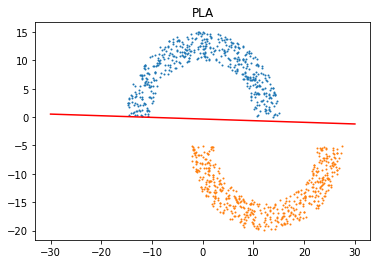

In [4]:

X_treat = np.c_[np.ones(N), point]
#PLA
t, last, w = PLA(X_treat, label)
r = 2 * (rad + thk)
a1 = np.array([-r,r])
b1 = - (w[0] + w[1] * a1) / w[2]


plt.plot(a1, b1, c="red")
plt.title('PLA')
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

### (b)

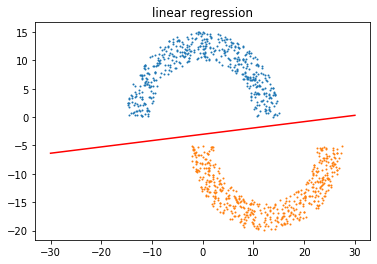

In [5]:
#(b)linear regression
w1 = inv(X_treat.T.dot(X_treat)).dot(X_treat.T).dot(label)

a2 = np.array([-r,r])
b2 = - (w1[0] + w1[1] * a1) / w1[2]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.plot(a2, b2, c="red")
plt.title('linear regression')
plt.show()

# problem 5


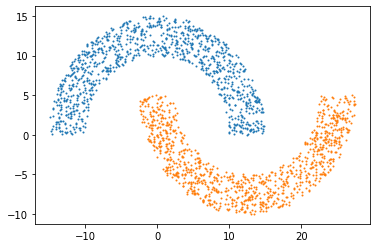

In [6]:
import matplotlib.pyplot as plt
rad = 10
thk = 5
sep = -5
N = 2000
top,bottom,label,point = generatedata(rad,thk,sep,N)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

### (a) 
    if I run PLA algorithm this time, because the data is not linear separable,  and the default for PLA is running untill it find a line that make the data linear separable, therefore the PLA will keep running

### (b)

In [7]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
def error_count(X, y, w):

    num = np.sum(X.dot(w) * y <= 0)
    return np.sum(num)

In [8]:
def Pocket_PLA(X, y, eta=1, max_step=np.inf):


    n, d = X.shape

    w = np.zeros(d)

    w0 = np.zeros(d)

    t = 0

    error = error_count(X, y, w0)
    #记录元素的下标
    i = 0
    #记录每一步的w
    W = []
    
    W_hat = []
    while (error != 0 and t < max_step):
        if np.sign(X[i, :].dot(w) * y[i]) <= 0:
            w += eta * y[i] * X[i, :]
            t += 1
            error_now = error_count(X, y, w)
            if error_now < error:
                error = error_now
                w0 = np.copy(w)

            W_hat.append(np.copy(w0))
            W.append(np.copy(w))
        i += 1
        if i == n:
            i = 0
    return np.array(W), np.array(W_hat), w0, error

In [9]:
X_treat = np.c_[np.ones(N), point]

max_iteration = 100000

W, W_hat,w0,error = Pocket_PLA(X_treat,label,max_step = max_iteration)

ein = np.mean(np.sign(W_hat.dot(X_treat.T)) != label, axis=1)
t= np.arange(max_iteration)
plt.plot(t,ein)
plt.title('Ein VS t')
plt.show()

MemoryError: Unable to allocate 1.49 GiB for an array with shape (100000, 2000) and data type float64

### (c)

In [ ]:
r = 2 * (rad + thk)
a1 = np.array([-r,r])
b1 = - (w[0] + w[1] * a1) / w[2]

plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.plot(a1, b1)
plt.title('Pocket PLA')
plt.show()
print('Pocket PLA error rate ' + str(error / N))

### (d)

In [ ]:
w_lr = inv(X_treat.T.dot(X_treat)).dot(X_treat.T).dot(label)
a2 = np.array([-r,r])
b2 = - (w_lr[0] + w_lr[1] * a1) / w_lr[2]
 
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.plot(a2, b2)
plt.title('linear regression')
plt.show()
error = np.mean(np.sign(X_treat.dot(w_lr)) != label)
print('linear regression error rate ' + str(error))

### (e)

#### e.a

In [ ]:
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(point)

# 定义等高线高度函数
def f(x1, x2, w):
    #将网格拉直并拼接
    X = np.c_[x1.reshape(-1, 1), x2.reshape(-1, 1)]
    #多项式转换
    poly = PolynomialFeatures(3)
    X_poly = poly.fit_transform(point)
    
    #计算结果
    result = X_poly.dot(w)
    #恢复成网格形状
    result = np.reshape(result, np.shape(x1))
    return result

#数据数目
n = 2000
#定义a, b
a = np.linspace(-r, r, n)
b = np.linspace(-r, r, n)

#生成网格数据
A, B = np.meshgrid(a, b)

#迭代次数
max_step = 10000

#Pocket_PLA
W_poly, W_poly_hat, w_poly, error_poly = Pocket_PLA(X_poly, label, max_step=max_step)
ein_poly = np.mean(np.sign(W_poly_hat.dot(X_poly.T)) != label, axis=1)


#### e.b

In [ ]:
plt.plot(t, ein_poly)
plt.title('Ein VS t')
plt.show()

#### e.c

In [62]:
plt.contour(A, B, f(A, B, w_poly), 1, colors = 'red')
plt.scatter(X[y>0][:, 0], X[y>0][:, 1], s=1)
plt.scatter(X[y<0][:, 0], X[y<0][:, 1], s=1)
plt.title('Pocket PLA')
plt.show()
print('特征转换后的Pocket PLA的错误率为' + str(error_poly / N))

ValueError: cannot reshape array of size 2000 into shape (2000,2000)